**TITLE: PREDICTION OF INDIVIDUAL MEDICAL COSTS BILLED BY HEALTH INSURANCE WITH THE HELP OF MULTI-LAYERED PERCEPTRON** 

**INTRODUCTION**

**INTUTION BEHIND WORKING OF NEURAL NETWORK**

It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.

Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as “Backward Propagation“.

In order to reduce this number of iterations to minimize the error, the neural networks use a common algorithm known as “Gradient Descent”, which helps to optimize the task quickly and efficiently.

This is how Neural networks work.

**MULTILAYER PERCEPTRON AND IT'S BASIC**

Just like atoms form the basics of any material on earth – the basic forming unit of a neural network is a perceptron. So, what is a perceptron?

A perceptron can be understood as anything that takes multiple inputs and produces one output. F

The next logical question is what is the relationship between input and output? Let us start with basic ways and build on to find more complex ways.

Below, are discussed three ways of creating input-output relationships:

1. By directly combining the input and computing the output based on a threshold value. for eg: Take x1=0, x2=1, x3=1 and setting a threshold =0. So, if x1+x2+x3>0, the output is 1 otherwise 0. You can see that in this case, the perceptron calculates the output as 1.

2. Next, let us add weights to the inputs. Weights give importance to an input. For example, you assign w1=2, w2=3, and w3=4 to x1, x2, and x3 respectively. To compute the output, we will multiply input with respective weights and compare with threshold value as w1*x1 + w2*x2 + w3*x3 > threshold. These weights assign more importance to x3 in comparison to x1 and x2.

3. Next, let us add bias: Each perceptron also has a bias which can be thought of as how much flexible the perceptron is. It is somehow similar to the constant b of a linear function y = ax + b. It allows us to move the lineup and down to fit the prediction with the data better. Without b the line will always go through the origin (0, 0) and you may get a poorer fit. For example, a perceptron may have two inputs, in that case, it requires three weights. One for each input and one for the bias. Now linear representation of input will look like, w1*x1 + w2*x2 + w3*x3 + 1*b.

But, all of this is still linear which is what perceptrons used to be. But that was not as much fun. So, people thought of evolving a perceptron to what is now called as an artificial neuron. A neuron applies non-linear transformations (activation function) to the inputs and biases.

**MULTI-LAYER PERCEPTRON**

Now, let’s move on to the next part of Multi-Layer Perceptron. So far, we have seen just a single layer consisting of 3 input nodes i.e x1, x2, and x3, and an output layer consisting of a single neuron. But, for practical purposes, the single-layer network can do only so much. An MLP consists of multiple layers called Hidden Layers stacked in between the Input Layer and the Output Layer.

The above we are talking about just a single hidden layer but in practice can contain multiple hidden layers. In addition, another point to remember in case of an MLP is that all the layers are fully connected i.e every node in a layer(except the input and the output layer) is connected to every node in the previous layer and the following layer.

**OBJECTIVES**

Here, in this analysis our main objective is to perform a,

To build a Linear regression model for the Medical cost dataset and predict individual medical costs billed by health insurance using multi-layer perceptron and compare it with a single-layer perceptron. 

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the packages required for building classification model using perceptrons.
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

**METHODOLOGY**

DATA DESCRIPTION

The dataset considered consist of 1338 observations on 7 variables. The dataset consist of following variables:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

***Target Variable***

charges: Individual medical costs billed by health insurance

***Feature Variables***

Age, Sex, BMI(body mass index), Children, Smokers, and Region feature


In [ ]:
#Loading the required dataset.
data=pd.read_csv("/content/insurance.csv")

#The 29 instances of the dataset is provided below:
data

,age,bmi,children,smoker,charges,sex,region
0,19,27.900,0,yes,16884.92400,female,southwest
1,18,33.770,1,no,1725.55230,male,southeast
2,28,33.000,3,no,4449.46200,male,southeast
3,33,22.705,0,no,21984.47061,male,northwest
4,32,28.880,0,no,3866.85520,male,northwest
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,male,northwest
1334,18,31.920,0,no,2205.98080,female,northeast
1335,18,36.850,0,no,1629.83350,female,southeast
1336,21,25.800,0,no,2007.94500,female,southwest


**EXPLORATORY DATA ANALYSIS**

Now we perform some basic EDA on this dataset. 

In [ ]:
#Obtaining the dimension of the dataset.
data.shape

(1338, 7)

It is observed that the dataset comprises of 1339 records and 7 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
 5   sex       1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above table, it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the above dataset we observe that the average individual medical costs billed by health insurance is 13270.422265 and we also observe that the average age of patients is 39 years and the 25 percentile is 27 i.e 25% of patients are having age below 27 years and 75% of the patients are having the age above 27 years but below 64 years.

In [ ]:
#Check for duplicated value
duplicate=data.duplicated()
print(duplicate.sum())

1


We observe that there exist one duplicate value in the dataset thus we try to remove that duplicate value.

In [ ]:
#Removing the duplicated value
data.drop_duplicates(inplace=True)

In [ ]:
#Now verify if there is any duplicated record left or not
dp1=data.duplicated()
print(dp1.sum())

0


Now, we observe that there does not exist any duplicate values in the dataset.

Text(0.5, 1.0, 'BOX PLOT [Figure 1]')

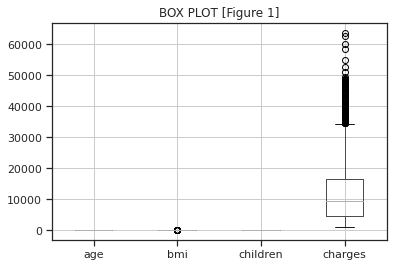

In [ ]:
#Draw boxplot for Outlier Analysis
data.boxplot()
plt.title('BOX PLOT [Figure 1]')

From the above boxplot we observe that in the above dataset only 'charges' attribute has the outliers.

In [ ]:
#Size of the DataFrame
print("No of elements in the dataset is",data.size)


No of elements in the dataset is 9359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea27e13410>,
      dtype=object)

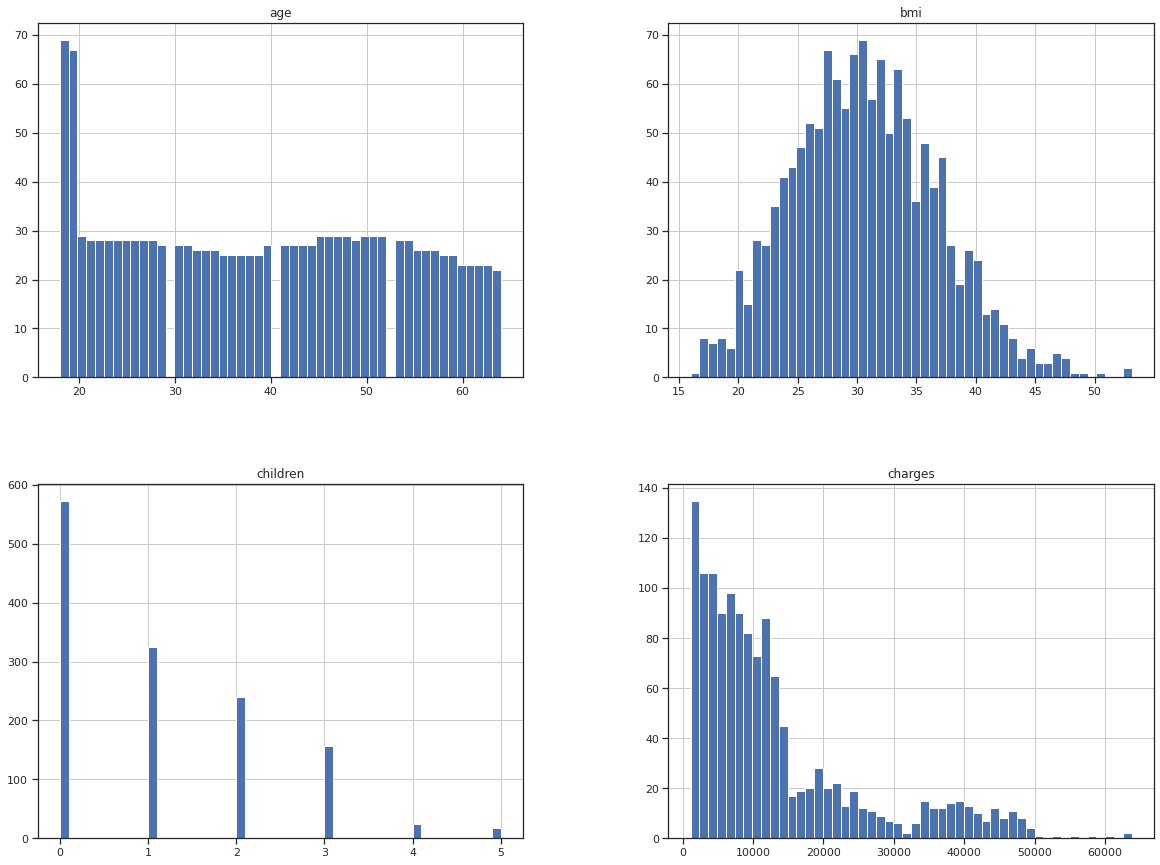

In [ ]:
#Visualize the distribution of data for every feature(For plotting histogram)
data.hist(bins=50, figsize=(20, 15))


Thus, the histogram for all the numerical variables are obtained.Hereafter plotting the histogram for numerical columns, we observe that ‘bmi’ is almost normally distributed whereas ‘charges’ are most probably to be right-skewed.

Let’s check the correlation of all the features with each other.

Text(0.5, 1.0, '[Figure 2]')

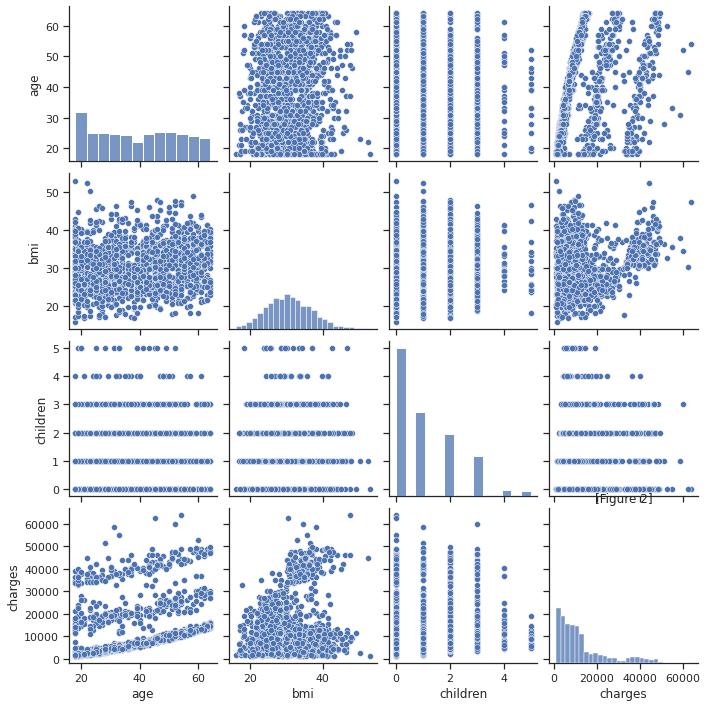

In [ ]:
#Plotting the pair plot to visualise the attributes all at once
sns.set_theme(style="ticks")
sns.pairplot(data)
plt.title('[Figure 2]')

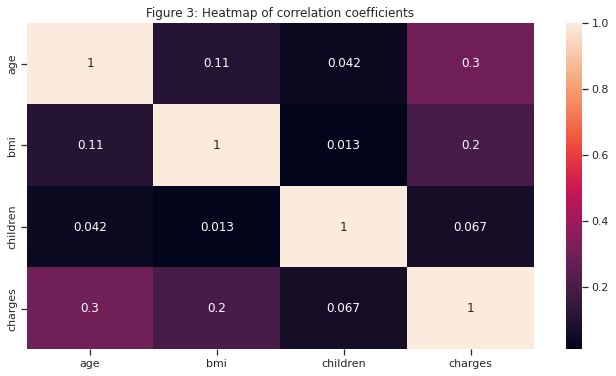

In [ ]:
#Obtaining the correlation matrix
fig=plt.figure(figsize=(25,6))
ax=fig.add_subplot(122)
sns.heatmap(data.corr(), annot = True)
ax.set_title("Figure 3: Heatmap of correlation coefficients")
plt.show()

In [ ]:
#Correlation values b/w numerical columns
corr_mat=data.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [ ]:
#Correlation of dependent column wrt independent columns
corr_mat['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

From the above scatter plot and heat map  and the tables we observe that all the numerical independent variables are positively correlated with the dependent variable charges. It can  also be observed that none of the independent variables are higghly correlated among each other thus, no multicolinearity.

In [ ]:
#Finding the sum of missing values per column if present
data.isnull().sum()

age         0
bmi         0
children    0
smoker      0
charges     0
sex         0
region      0
dtype: int64

Thus there are no null values in the dataset.

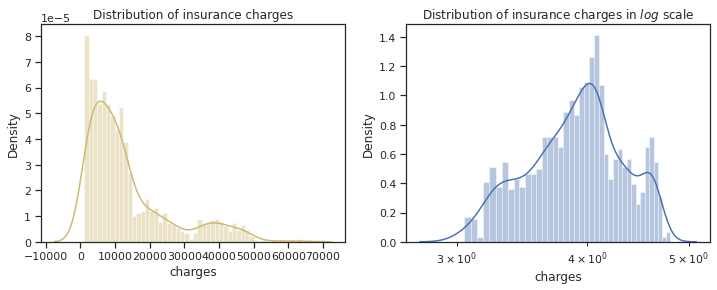

In [ ]:
#Plot the distribution of the dependent variable
import warnings
warnings.filterwarnings('ignore')
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of insurance charges')
ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

If we look at the first plot the charges vary from 1120 to 63500, the plot is right-skewed. And In the second plot we will apply a natural log, then the plot approximately tends to normal. For further analysis, we will apply log on target variable charges.

**DATA PREPROCESSING**

Machine learning algorithms are not able to work directly with categorical data so we have to convert categorical data into numbers. 

There are mainly three techniques to do this i.e.,

Label Encoding: Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them. 

One hot encoding: It represents the categorical variables in the form of binary vectors. It allows the representation of categorical data to be more expressive. Firstly,  the categorical values have been mapped to integer values, which is known as label encoding. Then, each integer value is represented as a binary vector that is all zero values except for the index of the integer, which is marked with a1

Dummy variable trap: This is a scenario when the independent variables are collinear with each other.

Here in this problem, we use a dummy variable trap. By using the pandas get_dummies function we can do all the above three steps in the line of code. We will this function to get dummy variables for sex,
children, smoker, region features. By setting drop_first =True function will remove dummy variables traps by dropping one variable and the original variable.

In [ ]:
#Name for all categorical columns
cat_cols=[col for col in data.columns if data[col].dtypes=='O']
cat_cols

['smoker', 'sex', 'region']

In [ ]:
#Apply the pd.get_dummies() function
data_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')

In [ ]:
#Let’s verify the dummy variable process
print('Columns in original data frame:n',data.columns.values)
print('nNumber of rows and columns in the dataset:',data.shape)
print('nColumns in data frame after encoding dummy variable:n',data_encode.columns.values)
print('nNumber of rows and columns in the dataset:',data_encode.shape)

Columns in original data frame:n ['age' 'bmi' 'children' 'smoker' 'charges' 'sex' 'region']
nNumber of rows and columns in the dataset: (1337, 7)
nColumns in data frame after encoding dummy variable:n ['age' 'bmi' 'children' 'charges' 'OHE_yes' 'OHE_male' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']
nNumber of rows and columns in the dataset: (1337, 9)


**BOX COX TRANSFORMATION**

It is a technique to transform non-normal dependent variables into a normal distribution.

Most of the time, Normality becomes a crucial assumption for many statistical techniques; so if your data is not normal, then applying a Box-Cox implies that you can run a broader number of tests.

All that we need to perform this transformation is to find the lambda value and apply the rule shown below to your variable. The trick of Box-Cox transformation is to find lambda value, however, in practice, this is quite affordable.

In [ ]:
#Log transform of the dependent variable
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(data_encode['charges'],alpha=0.05)
ci,lam

((-0.011576269777122257, 0.09872104960017168), 0.043516942579678274)

In [ ]:
#Log transformation of response variable
data_encode['charges'] = np.log(data_encode['charges'])

**ANALYSIS**

Now, we will separate the target variable(y) and features(X) as follows

In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=data_encode.drop(['charges'],axis=1)

#Extracting the variable y i.e. independent variable.
y=data_encode["charges"]

In [ ]:
# Splitting the data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1069, 8)
Testing split input-  (268, 8)


After splitting the dataset we have 1069 records(rows) for training and 268 records for testing purposes.

**MODELLING**

In [ ]:
#Defining the binary classifier using multi-layer perceptron
MLP_model=MLPRegressor()
MLP_model.fit(X_train,y_train)
print('Regression model using Multi-Layer Perceptron Created')

Regression model using Multi-Layer Perceptron Created


In [ ]:
#Extracting the parameters associated  with the model.
MLP_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**PREDICTION**

In [ ]:
#Predicting the values of test data.
y_pred = MLP_model.predict(X_test)
y_pred

array([ 8.82203738,  8.55837432,  9.44413593, 10.83385525,  8.53373741,
        9.14610137, 10.52060946,  7.87246163,  8.94132538,  9.41062018,
        9.62765683,  9.98742958, 10.39847295,  9.63920888,  8.90936163,
        8.87052748,  7.85475905, 10.38308132,  8.12504037,  8.29114409,
        7.84583982, 10.14978147,  9.36717915, 10.08171588, 10.6716393 ,
        8.36055482, 10.86559439, 10.55017809,  9.12621955,  9.46527415,
        8.43168926,  9.08328387,  7.73586966,  9.46584722, 11.35486979,
        9.07589435,  8.48087081,  8.49600045,  9.67693225,  8.92047744,
        8.03874262,  9.5060663 , 10.59583012,  9.17619636,  8.7630124 ,
        8.16033626,  7.63423615,  8.76137643,  8.35826387,  8.69740472,
        8.46929245,  8.79980519,  9.79122348,  7.73321952,  8.89957425,
        8.89251343,  9.25859084,  8.18906062, 10.47277543,  8.84365469,
        9.50059142,  8.60803797,  9.38713383,  7.69831643,  9.69058234,
        9.27346488,  8.77224437,  9.9858839 ,  9.78180224,  9.86

Thus above is the list for predicted value of hospital medical cost.

**EVALUATING THE MODEL**

In [ ]:
#Calculating the coeefficient of determination associated with the model.
from sklearn.metrics import r2_score
print('The R_2 score by using the normal equation is: ',r2_score(y_test, y_pred))

The R_2 score by using the normal equation is:  0.8534461760585913


We get the coefficient of determination to be 85.4% which means that 85.4% of the data best fits the model thus we can say that the above multiple linear regression model using MLP is a good fit.

In [ ]:
#Calculating mean squared error
from sklearn.metrics import mean_squared_error
print('The Mean Square Error(MSE) is: ',mean_squared_error(y_test, y_pred))


The Mean Square Error(MSE) is:  0.13602833667641703


Again it is observed that the rmse value for the above regression model is 0.14 which is relatively small and a good value for the model. Thus the above model is a good fit.

**MODEL VALIDATION (Residual Analysis)**

To validate the model we need to check a few assumptions of the linear regression model. The common assumption for the Linear Regression model
are as follows:

*   Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear.  This can be checked by scattering plotting between Actual value Vs Predicted value.
*   The residual error plot should be normally distributed.  

*   The mean of residual error should be 0 or close to 0 as much as possible.
*   Linear regression requires all variables to be multivariate normal. This assumption can best be checked with a Q-Q plot.

*   Linear regression assumes that there is little or no Multicollinearity in the data. Multicollinearity happens when the independent variables are correlated with each other. To identify the correlation between independent variables and the strength of that correlation, we use Variance Inflation Factor(VIF).
VIF=1/1-R2: If VIF >1 & VIF less than 5 moderate correlation, VIF < 5 critical level of multicollinearity.
*   Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plots. The heteroscedastic plot would exhibit a funnel shape pattern.

Text(0.5, 1.0, 'Check for Linearity:n Actual Vs Predicted value')

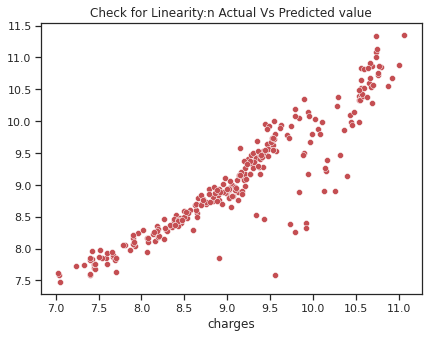

In [ ]:
#Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:n Actual Vs Predicted value')

In [ ]:
#Check for Residual normality & mean

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: n Residual eror');

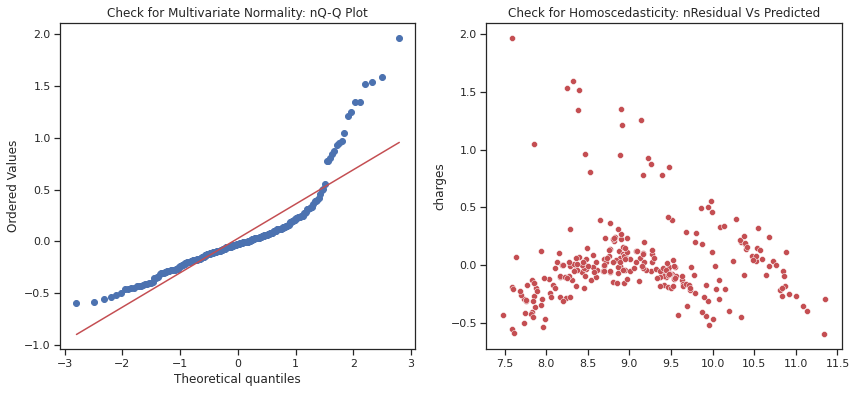

In [ ]:
#Check for Multivariate Normality

# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: nResidual Vs Predicted');

In [ ]:
#Check for Multicollinearity using Variance Inflation Factor

R_square_sk = r2_score(y_test, y_pred)
VIF = 1/(1- R_square_sk)
VIF

6.823431645153072

The model assumption linear regression as follows:

In our model, the actual vs predicted plot is curved so the linear assumption fails.

The residual mean is zero and the residual error plot is right-skewed.

Q-Q plot shows as the value log value greater than 1.5 trends to increase.

The plot exhibits heteroscedastic error and will increase after a certain point.

Variance inflation factor value is greater than 5, so there's  multicollinearity.

**CONCLUSION**

We get the coefficient of determination to be 85.4% which means that 85.4% of the data best fits the model thus we can say that the above multiple linear regression model using MLP is a good fit also we obtain a good rmse value i.e. 0.14 which means that the above model is a good fit.

But from the residual analysis we observe that not all the assumptions are satisfied about residuals thus we can say that the model assumptions are violated and we cannot trust the regression coefficients and numerical results that we obtain about the model's fit and we cannot comment anything in sure about the fit.